<a href="https://colab.research.google.com/github/octagomez/ML_empleados/blob/main/PPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#OBTENCION DEL DATA SET

In [2]:
#Vincula Colab con Drive (monta el Drive en la máquina virtual que nos provee Google)
from google.colab import drive

drive.mount('/content/DRIVE')

Mounted at /content/DRIVE


In [3]:
#Importo librerias
import pandas as pd
import numpy as np

In [5]:
#Lee el csv y lo convierte a un df de pandas
path = '/content/DRIVE/MyDrive/IA_TP/ML_EMPLEADOS/train.csv'
dataset_crudo = pd.read_csv(path)
dataset_crudo

,id,empleado,sexo,edad,años_edc,pareja,estudiante_act,estrato,pc,internet,etnia,padres_reside
0,12937,0,1,40.0,10.0,1,No,2,1,1,sin_rec_etnico,ninguno
1,27786,0,0,52.0,8.0,0,No,2,1,1,sin_rec_etnico,ninguno
2,6326,1,1,40.0,16.0,1,No,3,1,1,sin_rec_etnico,ninguno
3,36084,0,1,20.0,11.0,0,No,2,1,0,sin_rec_etnico,ninguno
4,19146,1,0,43.0,16.0,0,No,2,0,1,sin_rec_etnico,ninguno
...,...,...,...,...,...,...,...,...,...,...,...,...
25419,17369,1,0,30.0,12.0,0,No,3,0,1,sin_rec_etnico,ninguno
25420,28788,0,1,20.0,11.0,0,No,3,0,1,sin_rec_etnico,madre
25421,10879,1,1,34.0,17.0,1,No,3,1,1,sin_rec_etnico,ninguno
25422,26695,0,1,48.0,5.0,0,No,2,0,0,sin_rec_etnico,ninguno


# DATA CLEANING

In [6]:
#1)Primero analizo los null
#Total de null de todos los campos (1,23% de la base son null )
dataset_crudo.isnull().sum().sum()

314

In [7]:
#Total de null por campo
dataset_crudo.isnull().sum()

id                  0
empleado            0
sexo                0
edad               49
años_edc          110
pareja              0
estudiante_act      0
estrato             0
pc                  0
internet            0
etnia             155
padres_reside       0
dtype: int64

In [8]:
dataset_crudo.isna().sum()

id                  0
empleado            0
sexo                0
edad               49
años_edc          110
pareja              0
estudiante_act      0
estrato             0
pc                  0
internet            0
etnia             155
padres_reside       0
dtype: int64

In [9]:
#Resumen la tendencia central, la dispersión y la forma de la distribución de un conjunto de datos, excluyendo los valores NaN.

dataset_crudo.describe()

,id,empleado,edad,años_edc,pareja,estrato,pc,internet
count,25424.000000,25424.000000,25375.000000,25314.000000,25424.000000,25424.000000,25424.000000,25424.000000
mean,18141.339797,0.500433,37.095567,11.605001,0.455160,2.407292,0.520178,0.747915
std,10510.596370,0.500010,13.508600,3.970536,0.497995,0.902201,0.499603,0.434218
min,0.000000,0.000000,12.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,9043.750000,0.000000,26.000000,11.000000,0.000000,2.000000,0.000000,0.000000
50%,18171.500000,1.000000,35.000000,11.000000,0.000000,2.000000,1.000000,1.000000
75%,27242.250000,1.000000,47.000000,14.000000,1.000000,3.000000,1.000000,1.000000
max,36319.000000,1.000000,99.000000,26.000000,1.000000,6.000000,1.000000,1.000000


In [10]:
# Se elimina el id porque no es significativo (No es significativo a la hr de entrenar el modelo)
dataset_crudo = dataset_crudo.drop(columns='id')


In [11]:
#Reemplazamos los nulos en edad por la media
media_edad=dataset_crudo.edad.mean()
dataset_crudo["edad"] = dataset_crudo["edad"].fillna(media_edad)

In [12]:
#Otra vez isnull para ver que efectivamente fueron reemplazados
dataset_crudo.isnull().sum()

empleado            0
sexo                0
edad                0
años_edc          110
pareja              0
estudiante_act      0
estrato             0
pc                  0
internet            0
etnia             155
padres_reside       0
dtype: int64

In [13]:
#Reemplazmos los años_edc por su media
años_media = dataset_crudo.años_edc.mean()
dataset_crudo.años_edc = dataset_crudo.años_edc.fillna(años_media)
#vemos la info para ver si fue reemplazada y ya no es null
dataset_crudo.isnull().sum()

empleado            0
sexo                0
edad                0
años_edc            0
pareja              0
estudiante_act      0
estrato             0
pc                  0
internet            0
etnia             155
padres_reside       0
dtype: int64

In [14]:
#Hacemos lo mismo para etnia solo que lo reemplazamos por "sin_rec_etnico"
sin_etnia = "sin_rec_etnico"
dataset_crudo.etnia = dataset_crudo.etnia.fillna(sin_etnia)
#verificamos
dataset_crudo.isnull().sum()

empleado          0
sexo              0
edad              0
años_edc          0
pareja            0
estudiante_act    0
estrato           0
pc                0
internet          0
etnia             0
padres_reside     0
dtype: int64

In [15]:
# importante saber el Dtype de cada columna para normalizar 
#Los datos de tipo  Object (1 Sexo, 5 Estudiante act, 9 Etnia, 10 Padres_reside) los pasamos a Numericos...
dataset_crudo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25424 entries, 0 to 25423
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   empleado        25424 non-null  int64  
 1   sexo            25424 non-null  object 
 2   edad            25424 non-null  float64
 3   años_edc        25424 non-null  float64
 4   pareja          25424 non-null  int64  
 5   estudiante_act  25424 non-null  object 
 6   estrato         25424 non-null  int64  
 7   pc              25424 non-null  int64  
 8   internet        25424 non-null  int64  
 9   etnia           25424 non-null  object 
 10  padres_reside   25424 non-null  object 
dtypes: float64(2), int64(5), object(4)
memory usage: 2.1+ MB


In [16]:
#Devuelve la cantidad de valores unicos por campo de df
dataset_crudo.nunique(axis=0)

empleado           2
sexo               6
edad              79
años_edc          28
pareja             2
estudiante_act     5
estrato            6
pc                 2
internet           2
etnia              4
padres_reside      4
dtype: int64

In [17]:
#ETNIA
#Devuelve los valores unico de un campo 
print('Etnia = {}'.format(dataset_crudo.etnia.unique()))

Etnia = ['sin_rec_etnico' 'indigena' 'Afro' 'gitano']


In [18]:
type(dataset_crudo.etnia)
#Devuelve cuales son los valores unico de un campo
dataset_crudo.etnia.unique()


array(['sin_rec_etnico', 'indigena', 'Afro', 'gitano'], dtype=object)

In [19]:
#SEXO
print(dataset_crudo.sexo.unique())

['1' '0' 'HOMBRE' 'MUJER' 'Hombre' 'Mujer']


In [20]:
#Contamos los valores unicos (Para ver cual es el que predomina)
print(dataset_crudo["sexo"].value_counts())

0         13298
1         11888
MUJER        95
HOMBRE       70
Hombre       40
Mujer        33
Name: sexo, dtype: int64


In [21]:
#Normalizo string
dataset_crudo.sexo = dataset_crudo.sexo.replace(['Mujer'], 'MUJER')
dataset_crudo.sexo =dataset_crudo.sexo.replace(['Hombre'], 'HOMBRE')
#Vuelvo a ver como quedo
dataset_crudo.sexo.unique()

array(['1', '0', 'HOMBRE', 'MUJER'], dtype=object)

In [22]:
#Reemplazamos a Mujer=0 Hombre=1
#Como definimos que 0=mujer y 1=hombre?
dataset_crudo.sexo = dataset_crudo.sexo.replace(['MUJER'], 0)
dataset_crudo.sexo = dataset_crudo.sexo.replace(['HOMBRE'], 1)
dataset_crudo.sexo = dataset_crudo.sexo.replace(['0'], 0)
dataset_crudo.sexo = dataset_crudo.sexo.replace(['1'], 0)
#Vuelvo a ver como quedo
dataset_crudo.sexo.unique()

array([0, 1])

In [23]:
#ESTUDIANTE
dataset_crudo.estudiante_act.unique()

array(['No', 'Si', 'SI', 'SIPI', 'NO'], dtype=object)

In [24]:
dataset_crudo.estudiante_act = dataset_crudo.estudiante_act.replace(['No', 'NO'], 0)
dataset_crudo.estudiante_act = dataset_crudo.estudiante_act.replace(['Si', 'SI', 'SIPI'], 1)
dataset_crudo.estudiante_act.unique()

array([0, 1])

In [25]:
#PADRE RESIDE
dataset_crudo.nunique(axis=0)
dataset_crudo.padres_reside.unique()

array(['ninguno', 'padre y madre', 'madre', 'padre'], dtype=object)

In [26]:
#ESTRATO
dataset_crudo.estrato.unique()

array([2, 3, 4, 1, 5, 6])

In [27]:
dataset_crudo.nunique(axis=0)

empleado           2
sexo               2
edad              79
años_edc          28
pareja             2
estudiante_act     2
estrato            6
pc                 2
internet           2
etnia              4
padres_reside      4
dtype: int64

In [28]:
dataset_crudo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25424 entries, 0 to 25423
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   empleado        25424 non-null  int64  
 1   sexo            25424 non-null  int64  
 2   edad            25424 non-null  float64
 3   años_edc        25424 non-null  float64
 4   pareja          25424 non-null  int64  
 5   estudiante_act  25424 non-null  int64  
 6   estrato         25424 non-null  int64  
 7   pc              25424 non-null  int64  
 8   internet        25424 non-null  int64  
 9   etnia           25424 non-null  object 
 10  padres_reside   25424 non-null  object 
dtypes: float64(2), int64(7), object(2)
memory usage: 2.1+ MB


In [29]:
dataset_curado = dataset_crudo


In [31]:
#Guarda el DF CURADO en un archivo csv
dataset_curado.to_csv('/content/DRIVE/MyDrive/IA_TP/ML_EMPLEADOS/df_curado1', index=False)

#**VISUALIZACION**

#**ARBOL DE DESICION**

In [33]:
from sklearn import preprocessing
from sklearn import tree
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [34]:
dataset_curado_KDD = dataset_curado
#get_dummies convierte la variable categórica en variables ficticias/indicadoras (por cada categoria agrega una columna).
dataset_curado_KDD  = pd.get_dummies(dataset_curado_KDD , columns=['padres_reside'])
dataset_curado_KDD 

,empleado,sexo,edad,años_edc,pareja,estudiante_act,estrato,pc,internet,etnia,padres_reside_madre,padres_reside_ninguno,padres_reside_padre,padres_reside_padre y madre
0,0,0,40.0,10.0,1,0,2,1,1,sin_rec_etnico,0,1,0,0
1,0,0,52.0,8.0,0,0,2,1,1,sin_rec_etnico,0,1,0,0
2,1,0,40.0,16.0,1,0,3,1,1,sin_rec_etnico,0,1,0,0
3,0,0,20.0,11.0,0,0,2,1,0,sin_rec_etnico,0,1,0,0
4,1,0,43.0,16.0,0,0,2,0,1,sin_rec_etnico,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25419,1,0,30.0,12.0,0,0,3,0,1,sin_rec_etnico,0,1,0,0
25420,0,0,20.0,11.0,0,0,3,0,1,sin_rec_etnico,1,0,0,0
25421,1,0,34.0,17.0,1,0,3,1,1,sin_rec_etnico,0,1,0,0
25422,0,0,48.0,5.0,0,0,2,0,0,sin_rec_etnico,0,1,0,0


In [35]:
dataset_curado_KDD = pd.get_dummies(dataset_curado_KDD , columns=['etnia'])
dataset_curado_KDD 

,empleado,sexo,edad,años_edc,pareja,estudiante_act,estrato,pc,internet,padres_reside_madre,padres_reside_ninguno,padres_reside_padre,padres_reside_padre y madre,etnia_Afro,etnia_gitano,etnia_indigena,etnia_sin_rec_etnico
0,0,0,40.0,10.0,1,0,2,1,1,0,1,0,0,0,0,0,1
1,0,0,52.0,8.0,0,0,2,1,1,0,1,0,0,0,0,0,1
2,1,0,40.0,16.0,1,0,3,1,1,0,1,0,0,0,0,0,1
3,0,0,20.0,11.0,0,0,2,1,0,0,1,0,0,0,0,0,1
4,1,0,43.0,16.0,0,0,2,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25419,1,0,30.0,12.0,0,0,3,0,1,0,1,0,0,0,0,0,1
25420,0,0,20.0,11.0,0,0,3,0,1,1,0,0,0,0,0,0,1
25421,1,0,34.0,17.0,1,0,3,1,1,0,1,0,0,0,0,0,1
25422,0,0,48.0,5.0,0,0,2,0,0,0,1,0,0,0,0,0,1


In [36]:
dataset_curado_KDD .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25424 entries, 0 to 25423
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   empleado                     25424 non-null  int64  
 1   sexo                         25424 non-null  int64  
 2   edad                         25424 non-null  float64
 3   años_edc                     25424 non-null  float64
 4   pareja                       25424 non-null  int64  
 5   estudiante_act               25424 non-null  int64  
 6   estrato                      25424 non-null  int64  
 7   pc                           25424 non-null  int64  
 8   internet                     25424 non-null  int64  
 9   padres_reside_madre          25424 non-null  uint8  
 10  padres_reside_ninguno        25424 non-null  uint8  
 11  padres_reside_padre          25424 non-null  uint8  
 12  padres_reside_padre y madre  25424 non-null  uint8  
 13  etnia_Afro      

In [37]:
#Creo un df nuevo (df2) para no romper el df original (df) 
dataset_curado_KDD_2 = dataset_curado_KDD


In [38]:
dataset_curado_KDD_2 = dataset_curado_KDD_2 .drop(columns=["etnia_sin_rec_etnico" ])

In [39]:
##data_input['sexo'] = data_input['sexo'].astype(str).astype(float)

In [40]:
#Dividimos los datos
input = dataset_curado_KDD_2.drop(columns='empleado')
target = dataset_curado_KDD_2['empleado']
Datos_train, Datos_test, Target_train, Target_test = train_test_split (input, target, test_size= 0.2, random_state=42)

In [41]:
#Normalizamos el dataset 
min_max_scaler = preprocessing.MinMaxScaler()
Datos_train_normalizado = min_max_scaler.fit_transform(Datos_train)
Datos_test_normalizado = min_max_scaler.fit_transform(Datos_test)

In [44]:
#Generamos los parametros para hacer una busqueda en grilla del mejor modelo

model_params = {
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[10, 25, 50],        #numero de arboles en el bosque
            'max_depth':[3, 5,10,50,100,150],             #profundidad maxima del arbol
            'min_samples_split':[10, 50],  #numero minimo de muestras requeridas para dividir un nodo interno
            'min_samples_leaf':[10, 50],   #numero minimo de muestras requeridas para estar en un nodo hoja
            'criterion':['gini', 'entropy']
        }
    },
  'decision tree':{
      'model':tree.DecisionTreeClassifier(),
      'params':{
          'max_depth':[3, 5,10,50,100,150],
          'min_samples_split':[10, 50],
          'min_samples_leaf':[10, 50],
          'criterion':['gini','entropy']
      }
  }
}

In [45]:
#Hacemos la busqueda en grilla
score = []

for model_name, mp in model_params.items():

  clf=GridSearchCV(mp['model'],mp['params'], cv=3, return_train_score=False)
  clf.fit(Datos_train_normalizado, Target_train)
  
  score.append({
      'model':model_name,
      'best_score': clf.best_score_,
      'best_params': clf.best_params_
  })

In [50]:
#Vemos cuales fueron los mejores resultados de cada modelo y seleccionamos el mejor
df_score = pd.DataFrame(score, columns=['model', 'best_score', 'best_params'])
print(df_score['best_params'][0])

0    {'criterion': 'gini', 'max_depth': 100, 'min_s...
1    {'criterion': 'gini', 'max_depth': 50, 'min_sa...
Name: best_params, dtype: object


In [52]:
print(df_score['best_params'][0])
print(df_score['best_params'][1])

{'criterion': 'gini', 'max_depth': 100, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 50}
{'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 10, 'min_samples_split': 10}


In [53]:
#Entrenamos los modelos con las metricas obtenidas de la grilla
random_forest = RandomForestClassifier(criterion= 'gini', max_depth= 100, min_samples_leaf= 10, min_samples_split= 10, n_estimators= 50).fit(Datos_train_normalizado, Target_train)
decision_tree = tree.DecisionTreeClassifier(criterion= 'gini', max_depth= 50, min_samples_leaf= 10, min_samples_split= 10).fit(Datos_train_normalizado, Target_train)

random_forest_prediction = random_forest.predict(Datos_test_normalizado)
decision_tree_prediction = decision_tree.predict(Datos_test_normalizado)

random_forest_accuracy = accuracy_score(Target_test, random_forest_prediction)
decision_tree_accuracy = accuracy_score(Target_test, decision_tree_prediction)



In [54]:
random_forest_accuracy

0.6814159292035398

In [55]:
decision_tree_accuracy

0.6831858407079646

Text(0.5, 1.0, 'Decision Tree (Acc: 0.6832)')

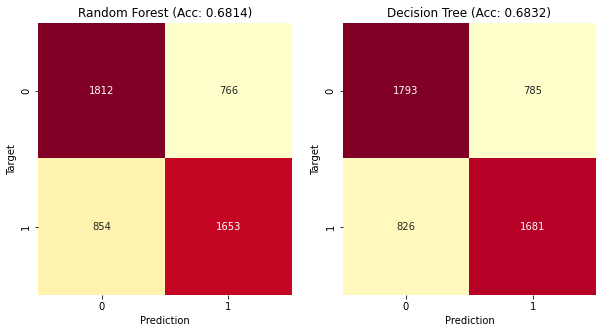

In [56]:
plt.figure(figsize=(10,5))
ax = plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(Target_test, random_forest_prediction), annot=True, fmt="g",  cmap="YlOrRd", cbar=False)
ax.set_xlabel('Prediction')
ax.set_ylabel('Target')
ax.set_title(f"Random Forest (Acc: {random_forest_accuracy:.4f})")
ax = plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(Target_test, decision_tree_prediction), annot=True, fmt="g",  cmap="YlOrRd", cbar=False)
ax.set_xlabel('Prediction')
ax.set_ylabel('Target')
ax.set_title(f"Decision Tree (Acc: {decision_tree_accuracy:.4f})")

In [57]:
#Porque el random forest dio los mejores resultados vemos la importancia de los atributos para este modelo
importances = list(random_forest.feature_importances_)
input_list = list(input.columns)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(input_list,importances)]
feature_importances = sorted(feature_importances, key= lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances ];

Variable: edad                 Importance: 0.38
Variable: años_edc             Importance: 0.15
Variable: estrato              Importance: 0.12
Variable: pc                   Importance: 0.12
Variable: pareja               Importance: 0.07
Variable: internet             Importance: 0.06
Variable: padres_reside_ninguno Importance: 0.04
Variable: padres_reside_madre  Importance: 0.02
Variable: padres_reside_padre y madre Importance: 0.02
Variable: estudiante_act       Importance: 0.01
Variable: sexo                 Importance: 0.0
Variable: padres_reside_padre  Importance: 0.0
Variable: etnia_Afro           Importance: 0.0
Variable: etnia_gitano         Importance: 0.0
Variable: etnia_indigena       Importance: 0.0


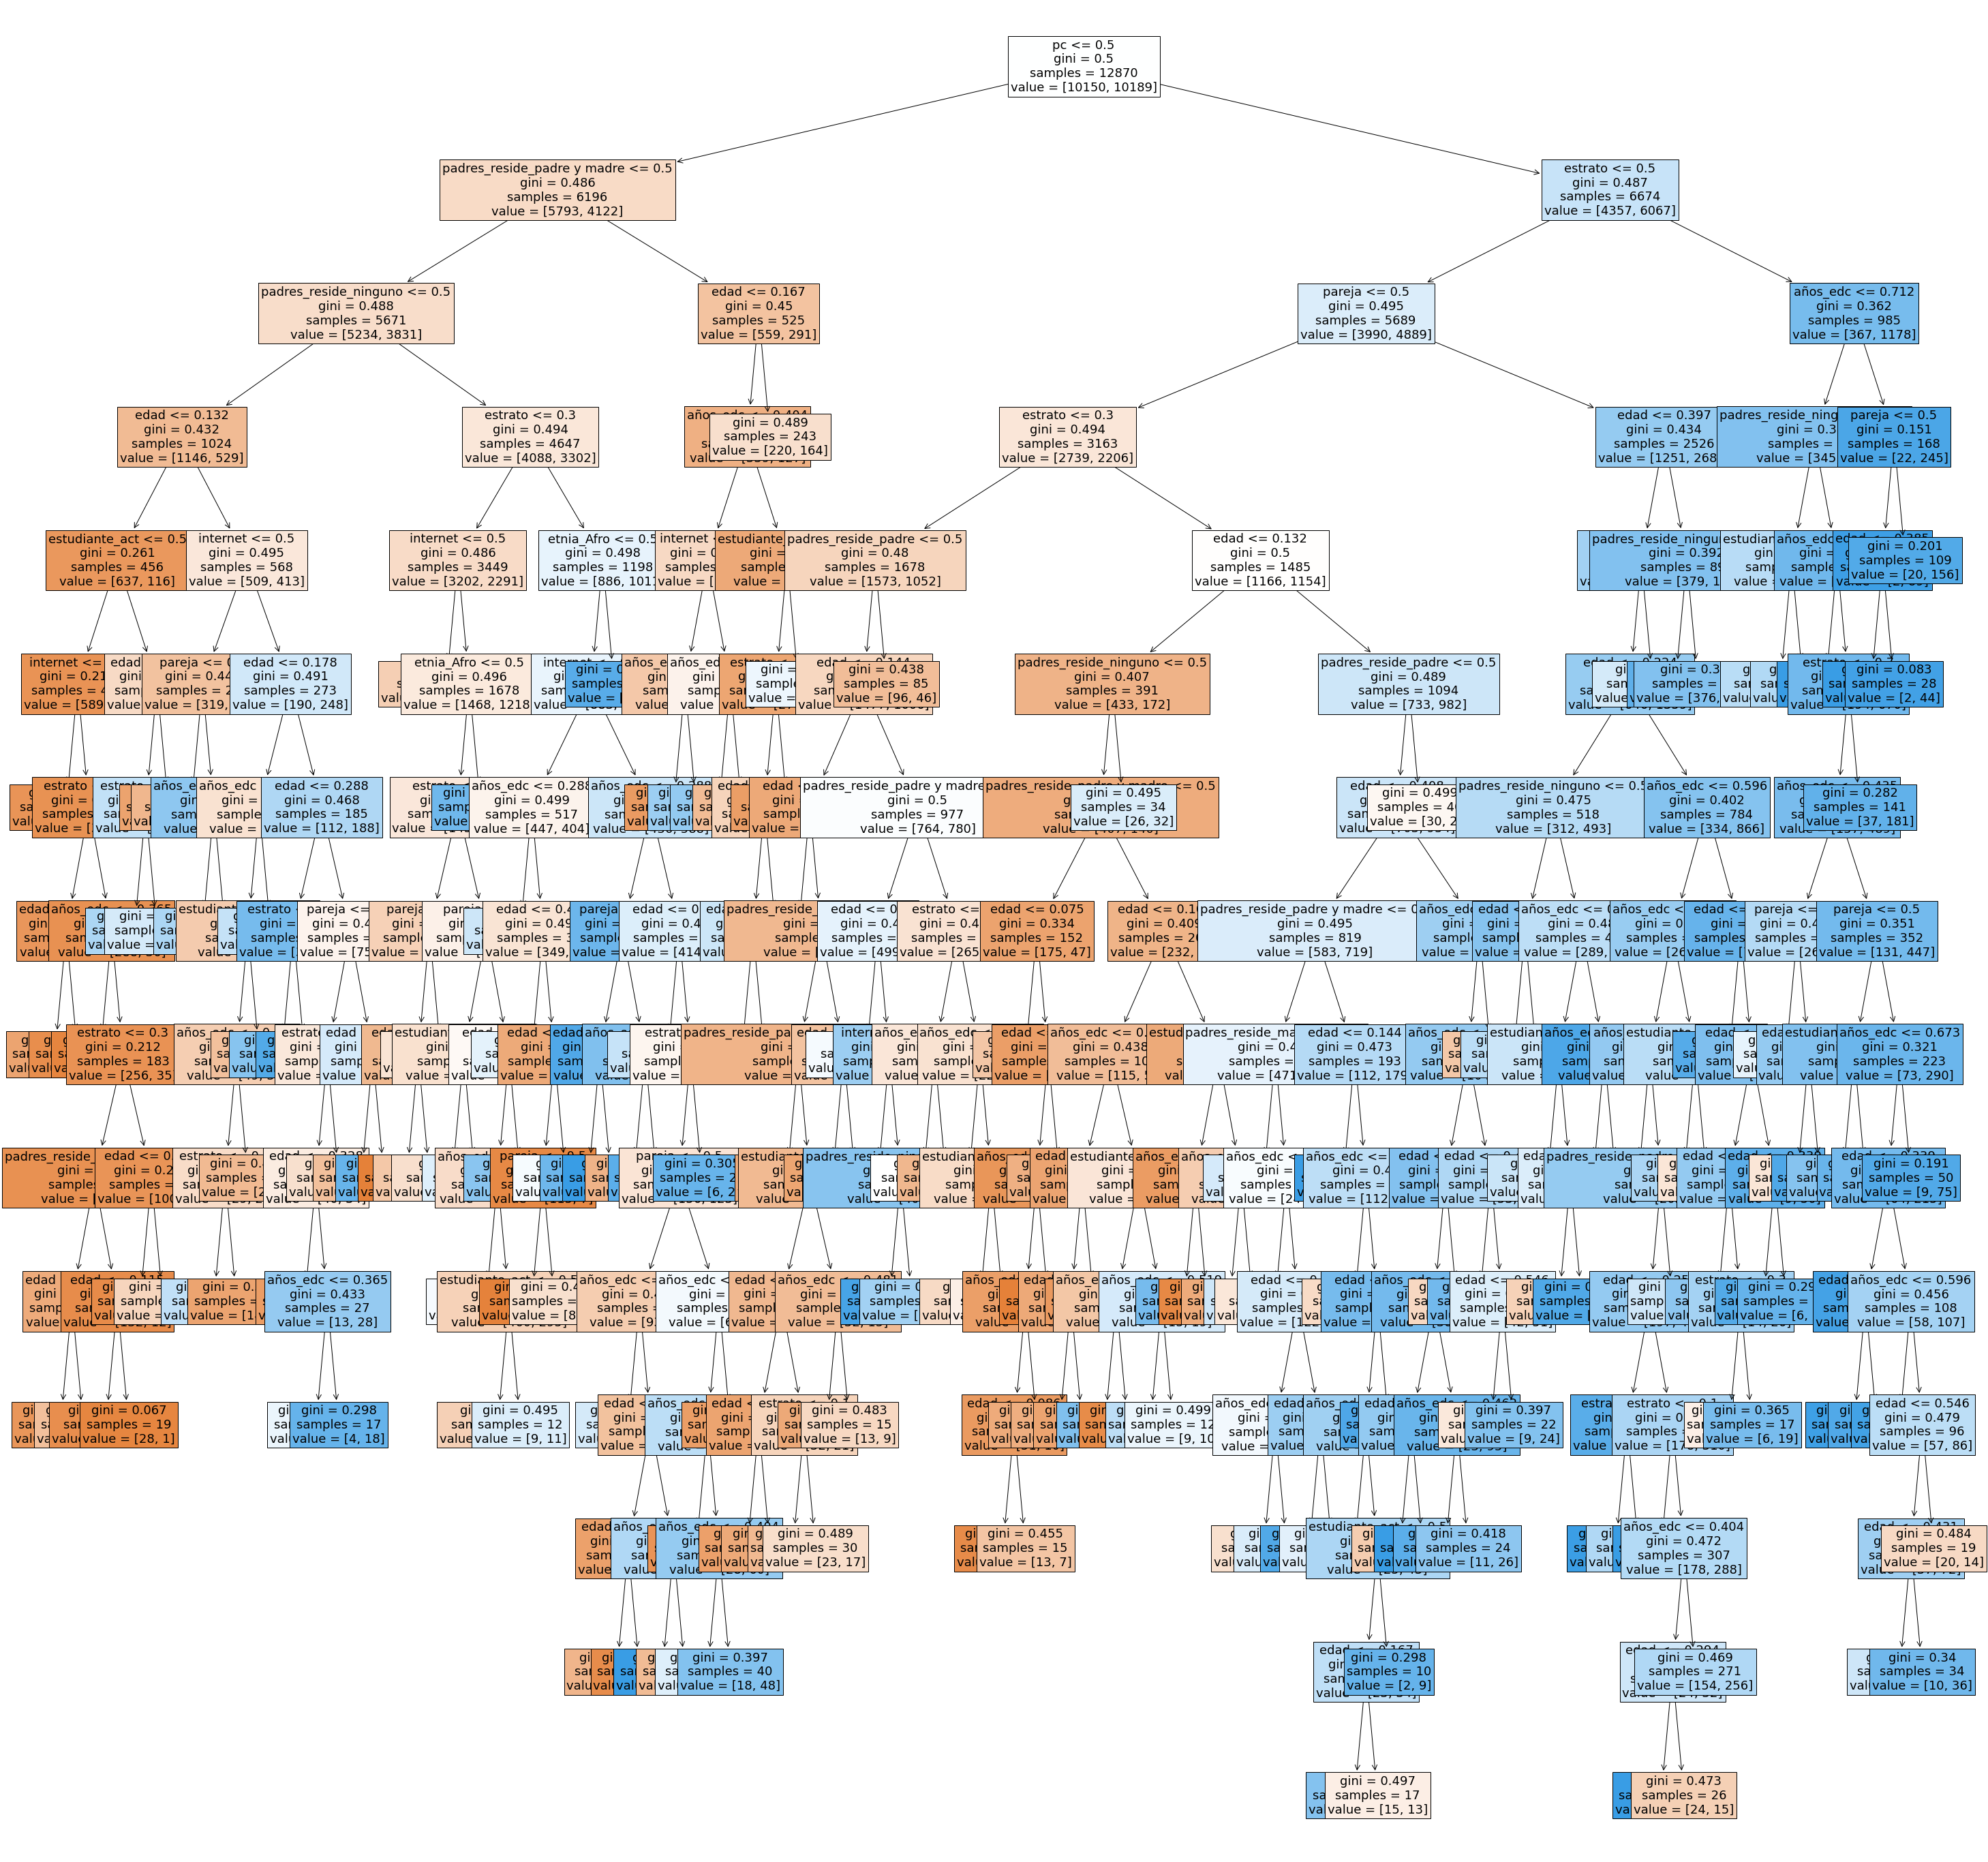

In [58]:
plt.figure(figsize=(50,50))
_ = tree.plot_tree(random_forest.estimators_[0], feature_names=input.columns, filled=True, fontsize=18)


#**REGRESION** **LINEAL**

In [ ]:
from sklearn import linear_model

In [ ]:
#Instanciamos el modelo de Regresion lineal (en reg guardo el modelo)
reg = linear_model.LinearRegression()
#get_dummies convierte la variable categórica en variables ficticias/indicadoras (por cada categoria agrega una columna).
df = pd.get_dummies(df, columns=['etnia'])
df = pd.get_dummies(df, columns=['padres_reside'])
df

In [ ]:
#Creo un df nuevo (df2) para no romper el df original (df) 
df2=df
df2

In [ ]:
#DE AHORA EN ADELANTE TRABAJO CON df2
#copia toda la columna empleado en la variable target 
target = np.array(df2.empleado)
#elimina la columna empleado y graba el df2 sin la col empleado en la variable data_input (este data_input es otro df)
data_input = df2.drop(columns='empleado')
data_input['sexo'] = data_input['sexo'].astype(str).astype(float)
#convierte el data_input en un array de numpy (que tiene todo el set de datos menos la col empleado)
input = np.array(data_input)

In [ ]:
#El array input contiene a las variables x (predictoras)
input

In [ ]:
#Target es el vector Y que quiero predecir
#vector target que ahora contiene los valores que eran de la col empleado
target

In [ ]:
from sklearn.model_selection import train_test_split
#Fraccionamos el set de datos en train y test
#El test_size tiene un tamaño del 20% de los datos 
#El random_state controla la mezcla aplicada a los datos antes de aplicar la división.
X_train, X_test, y_train, y_test = train_test_split (input, target, test_size= 0.2, random_state=42)

In [ ]:
#Vemos como quedaron divididos los datos
print("X_train:", X_train.shape)
print("X_test:",X_test.shape)
print("input:",input.shape)
print()
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)
print("target:",target.shape)

In [ ]:
#OTRA FORMA
#a = np.random.randn(len(df2))
#check = (a<0.8)
#training = df2[check]
#testing = df2[~check]

In [ ]:
#DA DISTINTO VER XQ!
#len(training), len(testing)

**ENTRENAMIENTO DEL MODELO**

In [ ]:
#Entrenamiento del modelo
reg.fit(X_train,y_train)

In [ ]:
reg.score(X_train, y_train)

#REGRESION LOGISTICA

In [ ]:
#Librerías para normalización, regresión Logística y métricas de precisión
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

##DIVISION DEL DATA SET

In [ ]:
df2.head(2)

In [ ]:
sexo	estudiante_act

In [ ]:
input=df2[["sexo","estrato","edad","años_edc"]]

In [ ]:
input

In [ ]:
#Dividimos los datos
#input = df2.drop(columns='empleado')
target = df2['empleado']
Datos_train, Datos_test, Target_train, Target_test = train_test_split (input, target, test_size= 0.2, random_state=42)

In [ ]:
#Vemos como quedaron divididos los datos
print("Datos_train:", Datos_train.shape)
print("Datos_test:",Datos_test.shape)
print("input:",input.shape)
print()
print("Target_train:",Target_train.shape)
print("Target_test:",Target_test.shape)
print("target:",target.shape)

In [ ]:
#Normalizamos el dataset
min_max_scaler = preprocessing.MinMaxScaler()
Datos_train_normalizado = min_max_scaler.fit_transform(Datos_train)
Datos_test_normalizado = min_max_scaler.fit_transform(Datos_test)

In [ ]:
Datos_train_normalizado

In [ ]:
#Entrenamos el modelo
reglog=LogisticRegression()
#Debimos aumentar el máximo de iteraciones porque la librería indicaba que faltaban iteraciones para la convergencia
reglog.max_iter=130
reglog.fit(Datos_train_normalizado, Target_train)

In [ ]:
#Hacemos la predicción sobre los datos de testeo
pred= reglog.predict(Datos_test_normalizado)

In [ ]:
#Los coeficientes me indican la importancia de las columnas al resultado
importance = reglog.coef_[0]

In [ ]:
importance

##**METRICAS**

In [ ]:
#Verificamos que tan acertada fue la respuesta del modelo
accuracy=accuracy_score(Target_test, pred)
accuracy

In [ ]:
#Imprimimos la matriz de confusión
conf = confusion_matrix(Target_test, pred)
conf

In [ ]:
#Imprimimos más métricas de evaluación
target_names = ['empleado', 'no empleado']
print(classification_report(Target_test, pred, target_names=target_names))

#CODIGOS QUE ME PUEDEN SERVIR

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
X = df2["sexo"].fillna(df2["sexo"].mean()).to_numpy()
Y = df2["años_edc"].fillna(df2["años_edc"].mean())
X_data = X[:,np.newaxis]

In [ ]:
%matplotlib inline
plt.plot(X,Y, "ro")
plt.plot(X, reg.predict(X_data), color="blue")

In [ ]:
#CODIGO PARA BALANCEAR EL SET DE DATOS
# Upsample minority class
#df_minority_upsampled = resample(df_minority,
#replace=True, # sample with replacement
#n_samples=576, # to match majority class
#random_state=123) # reproducible results